In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA

In [6]:
CATEGORIES = [
    'fear',
    'anger',
    'anticipation',
    'trust',
    'surprise',
    'positive',
    'negative',
    'sadness',
    'disgust',
    'joy'
]
COLORS = ['red', 'brown', 'purple', 'yellow', 'blue', 'orange', 'green']
# neutral gray
# black other

TRAIN_DATA_PATH_OUT = "datasets/WASSA23_essay_level_train_preproc.tsv"
DEV_DATA_PATH_OUT = "datasets/WASSA23_essay_level_dev_preproc.tsv"
TEST_DATA_PATH_OUT = "datasets/WASSA23_essay_level_test_preproc.tsv"

In [3]:
df = pd.read_csv(TRAIN_DATA_PATH_OUT, sep='\t', header=0)
df

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,hope_count,empathy_count,distress_count,essay+prompt,prompt,conversation_id,article_id,speaker_id,speaker_number,split
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,0.000000,3.419628,3.199801,it is really diheartening to read about these ...,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,0.000000,2.716905,2.715752,the phone lines from the suicide prevention li...,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,...,0.000000,3.202293,2.954012,"no matter what your heritage, you should be ab...",An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,...,0.071429,3.111886,3.035200,it is frightening to learn about all these sha...,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,0.000000,3.112390,2.945490,the eldest generation of russians aren't being...,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1.000000,1.625,"After reading the article, i felt really alarm...",Fear/Hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,0.000000,2.865683,2.804874,"After reading the article, i felt really alarm...","An essay written by a 29 years old white male,...",430.0,397.0,17.0,1.0,train
2433,2.500000,1.500,It's very difficult to fathom living somewhere...,Joy/Sadness,2.0,7.0,1.0,38.0,42000.0,7.00,...,0.000000,2.990842,2.915323,It's very difficult to fathom living somewhere...,An essay written by a 38 years old white femal...,374.0,367.0,24.0,1.0,train
2434,3.166667,2.750,it's crazy how islamic terrorism is still a th...,Anger/Surprise,1.0,6.0,1.0,34.0,68000.0,5.50,...,0.000000,2.706823,2.713512,it's crazy how islamic terrorism is still a th...,"An essay written by a 34 years old white male,...",260.0,174.0,46.0,2.0,train
2435,6.666667,6.375,Humans are the most selfish and wicked of all ...,Disgust/Neutral,1.0,7.0,1.0,28.0,165000.0,6.25,...,0.285714,3.194537,3.028520,Humans are the most selfish and wicked of all ...,"An essay written by a 28 years old white male,...",98.0,57.0,40.0,2.0,train


array([[<Axes: title={'center': 'fear_count'}>,
        <Axes: title={'center': 'anger_count'}>,
        <Axes: title={'center': 'anticipation_count'}>,
        <Axes: title={'center': 'trust_count'}>,
        <Axes: title={'center': 'surprise_count'}>],
       [<Axes: title={'center': 'positive_count'}>,
        <Axes: title={'center': 'negative_count'}>,
        <Axes: title={'center': 'sadness_count'}>,
        <Axes: title={'center': 'disgust_count'}>,
        <Axes: title={'center': 'joy_count'}>]], dtype=object)

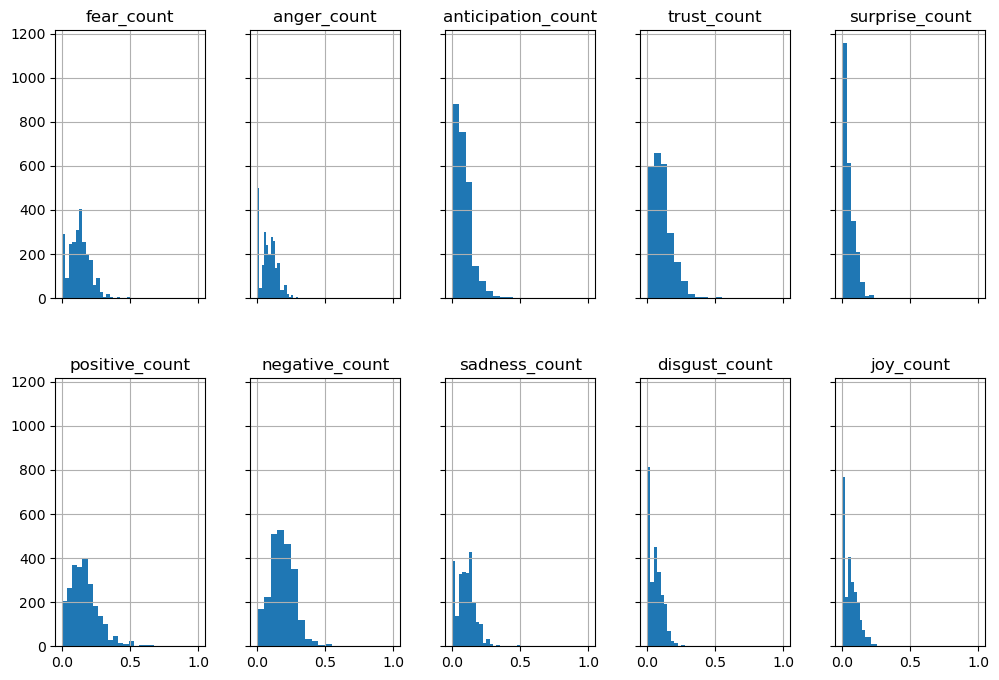

In [8]:
# TODO: change order (?), colors and titles
df[[f'{category}_count' for category in CATEGORIES]].hist(bins=20, sharex=True, sharey=True, layout=(2, 5), figsize=(12, 8))

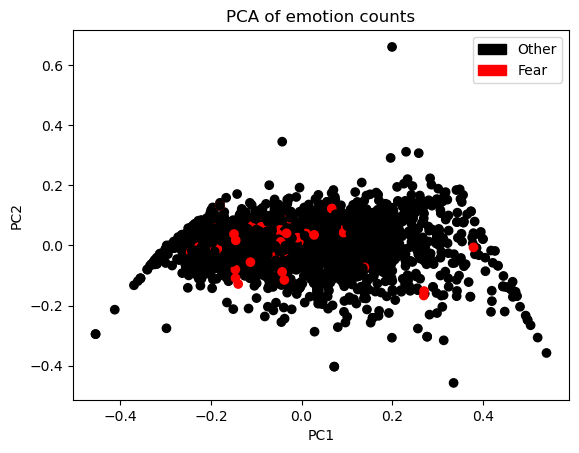

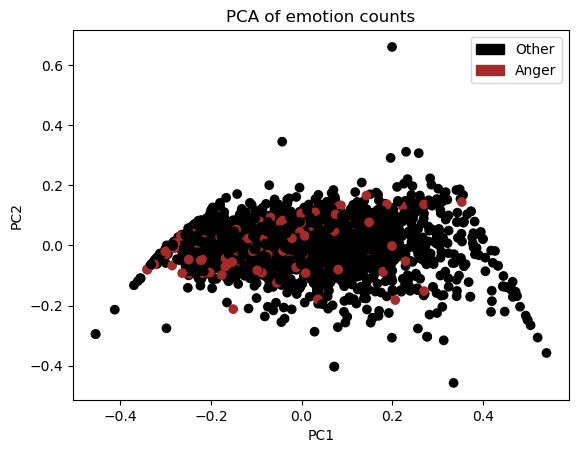

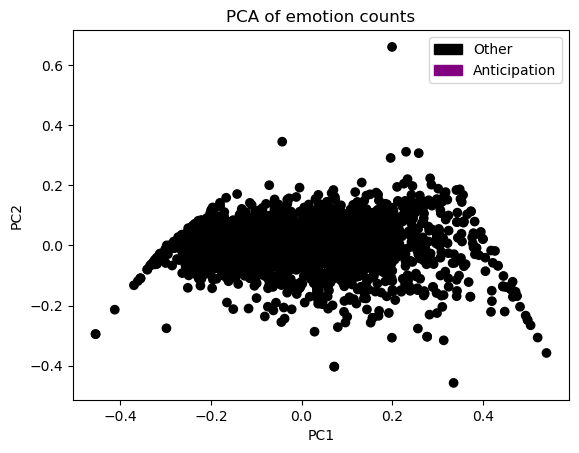

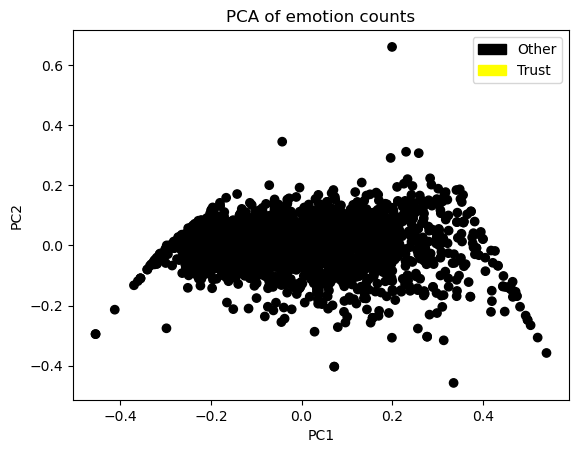

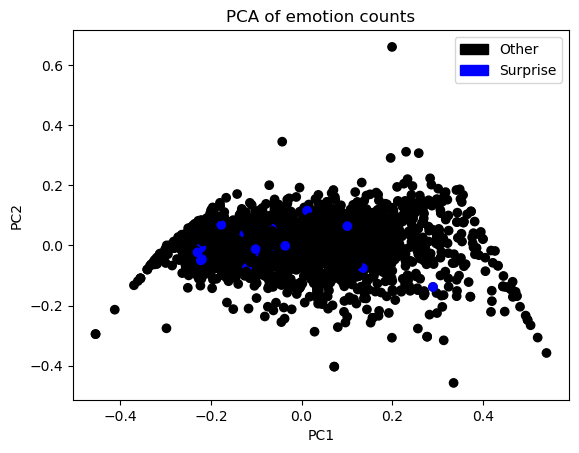

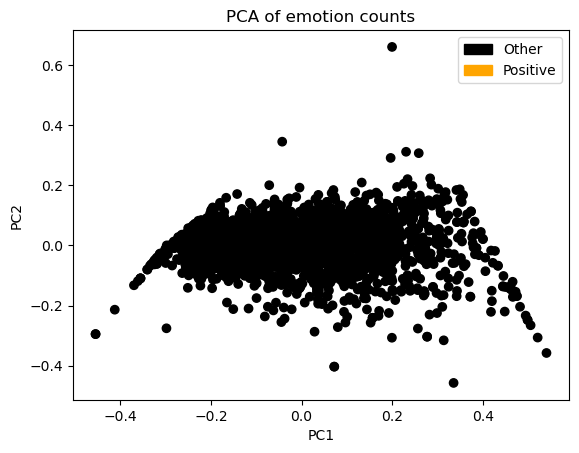

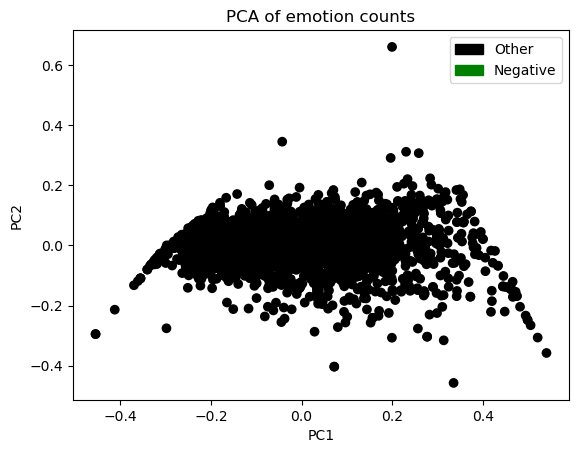

In [9]:
pca = PCA(n_components=2)
pca.fit(df[[f'{category}_count' for category in CATEGORIES]])
pca_train_df = pca.transform(df[[f'{category}_count' for category in CATEGORIES]])

# TODO: subplots

for category, color in zip(CATEGORIES, COLORS):
	colors = []
	for index, row in df.iterrows():
		if category.capitalize() in row['emotion']:
			colors.append(color)
		else:
			colors.append('black')
	plt.figure()
	plt.scatter(pca_train_df[:,0], pca_train_df[:,1], c=colors)
	plt.xlabel('PC1')
	plt.ylabel('PC2')
	red_patch = mpatches.Patch(color='black', label='Other')
	blue_patch = mpatches.Patch(color=color, label=category.capitalize())
	plt.legend(handles=[red_patch, blue_patch])
	plt.title('PCA of emotion counts')

In [ ]:
# TODO: do for dev and test?